# 

# Visualization

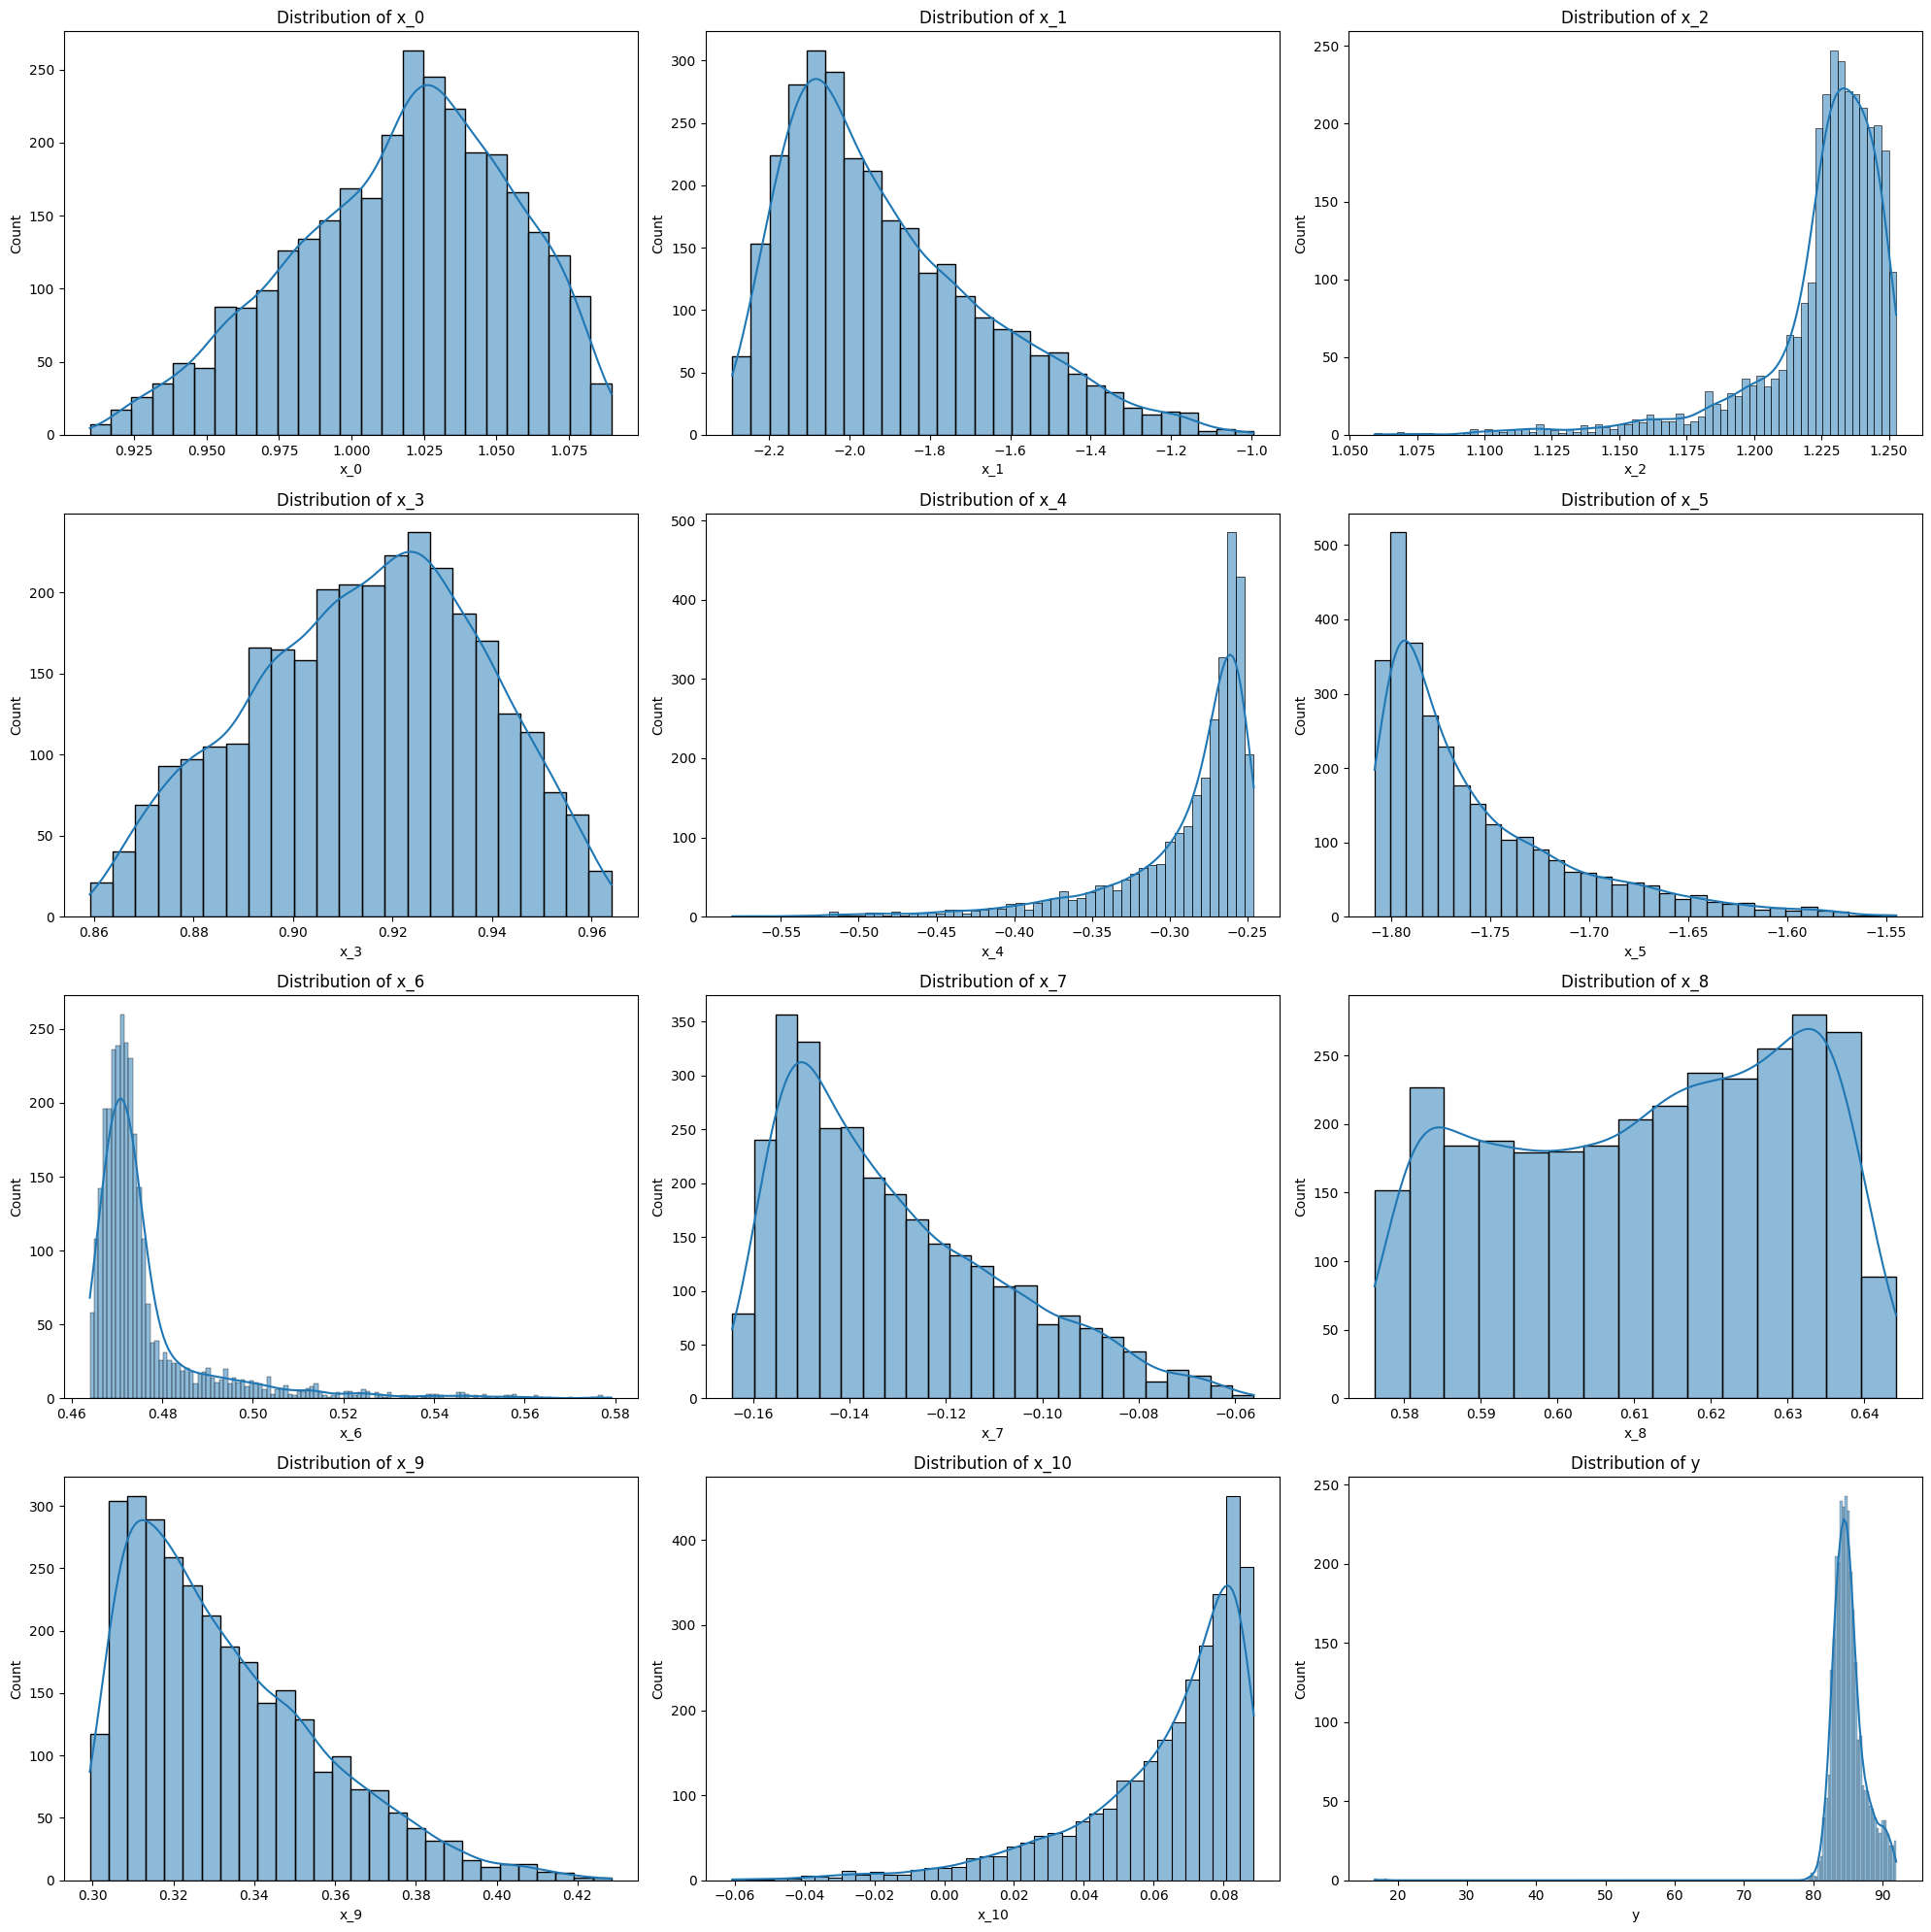

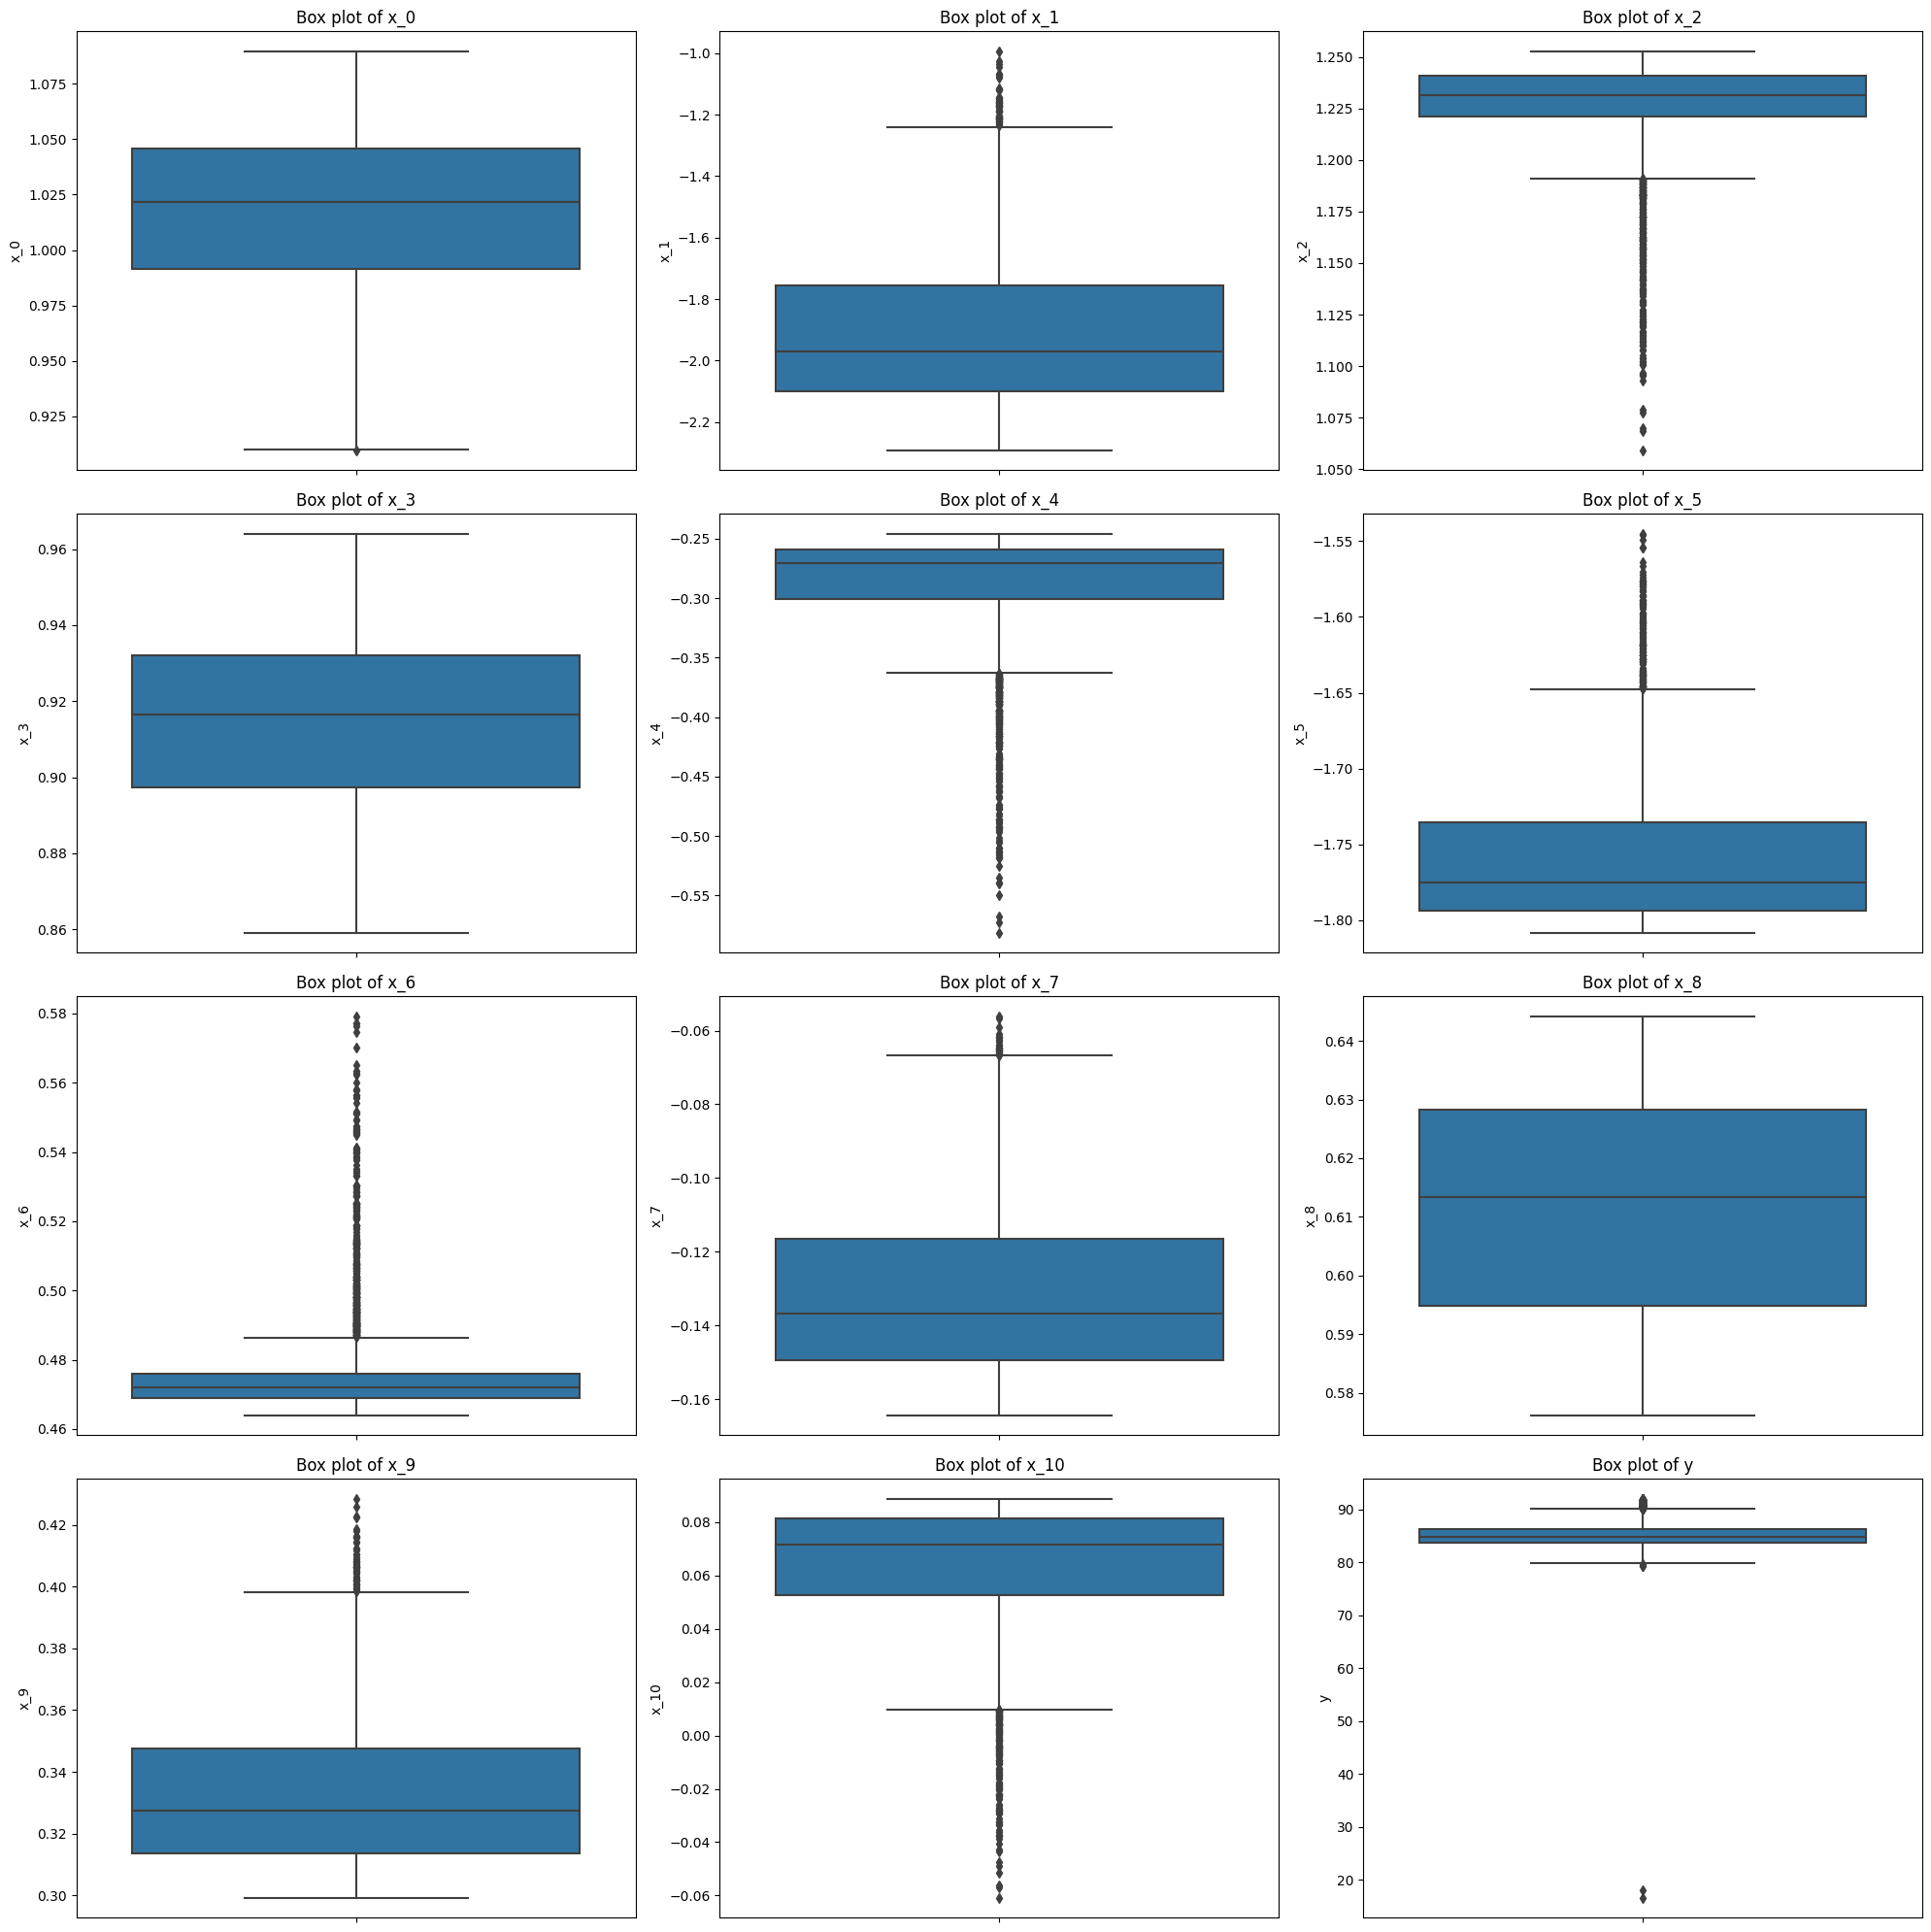

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('train.csv')

# Create histograms for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Create box plots for each variable
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

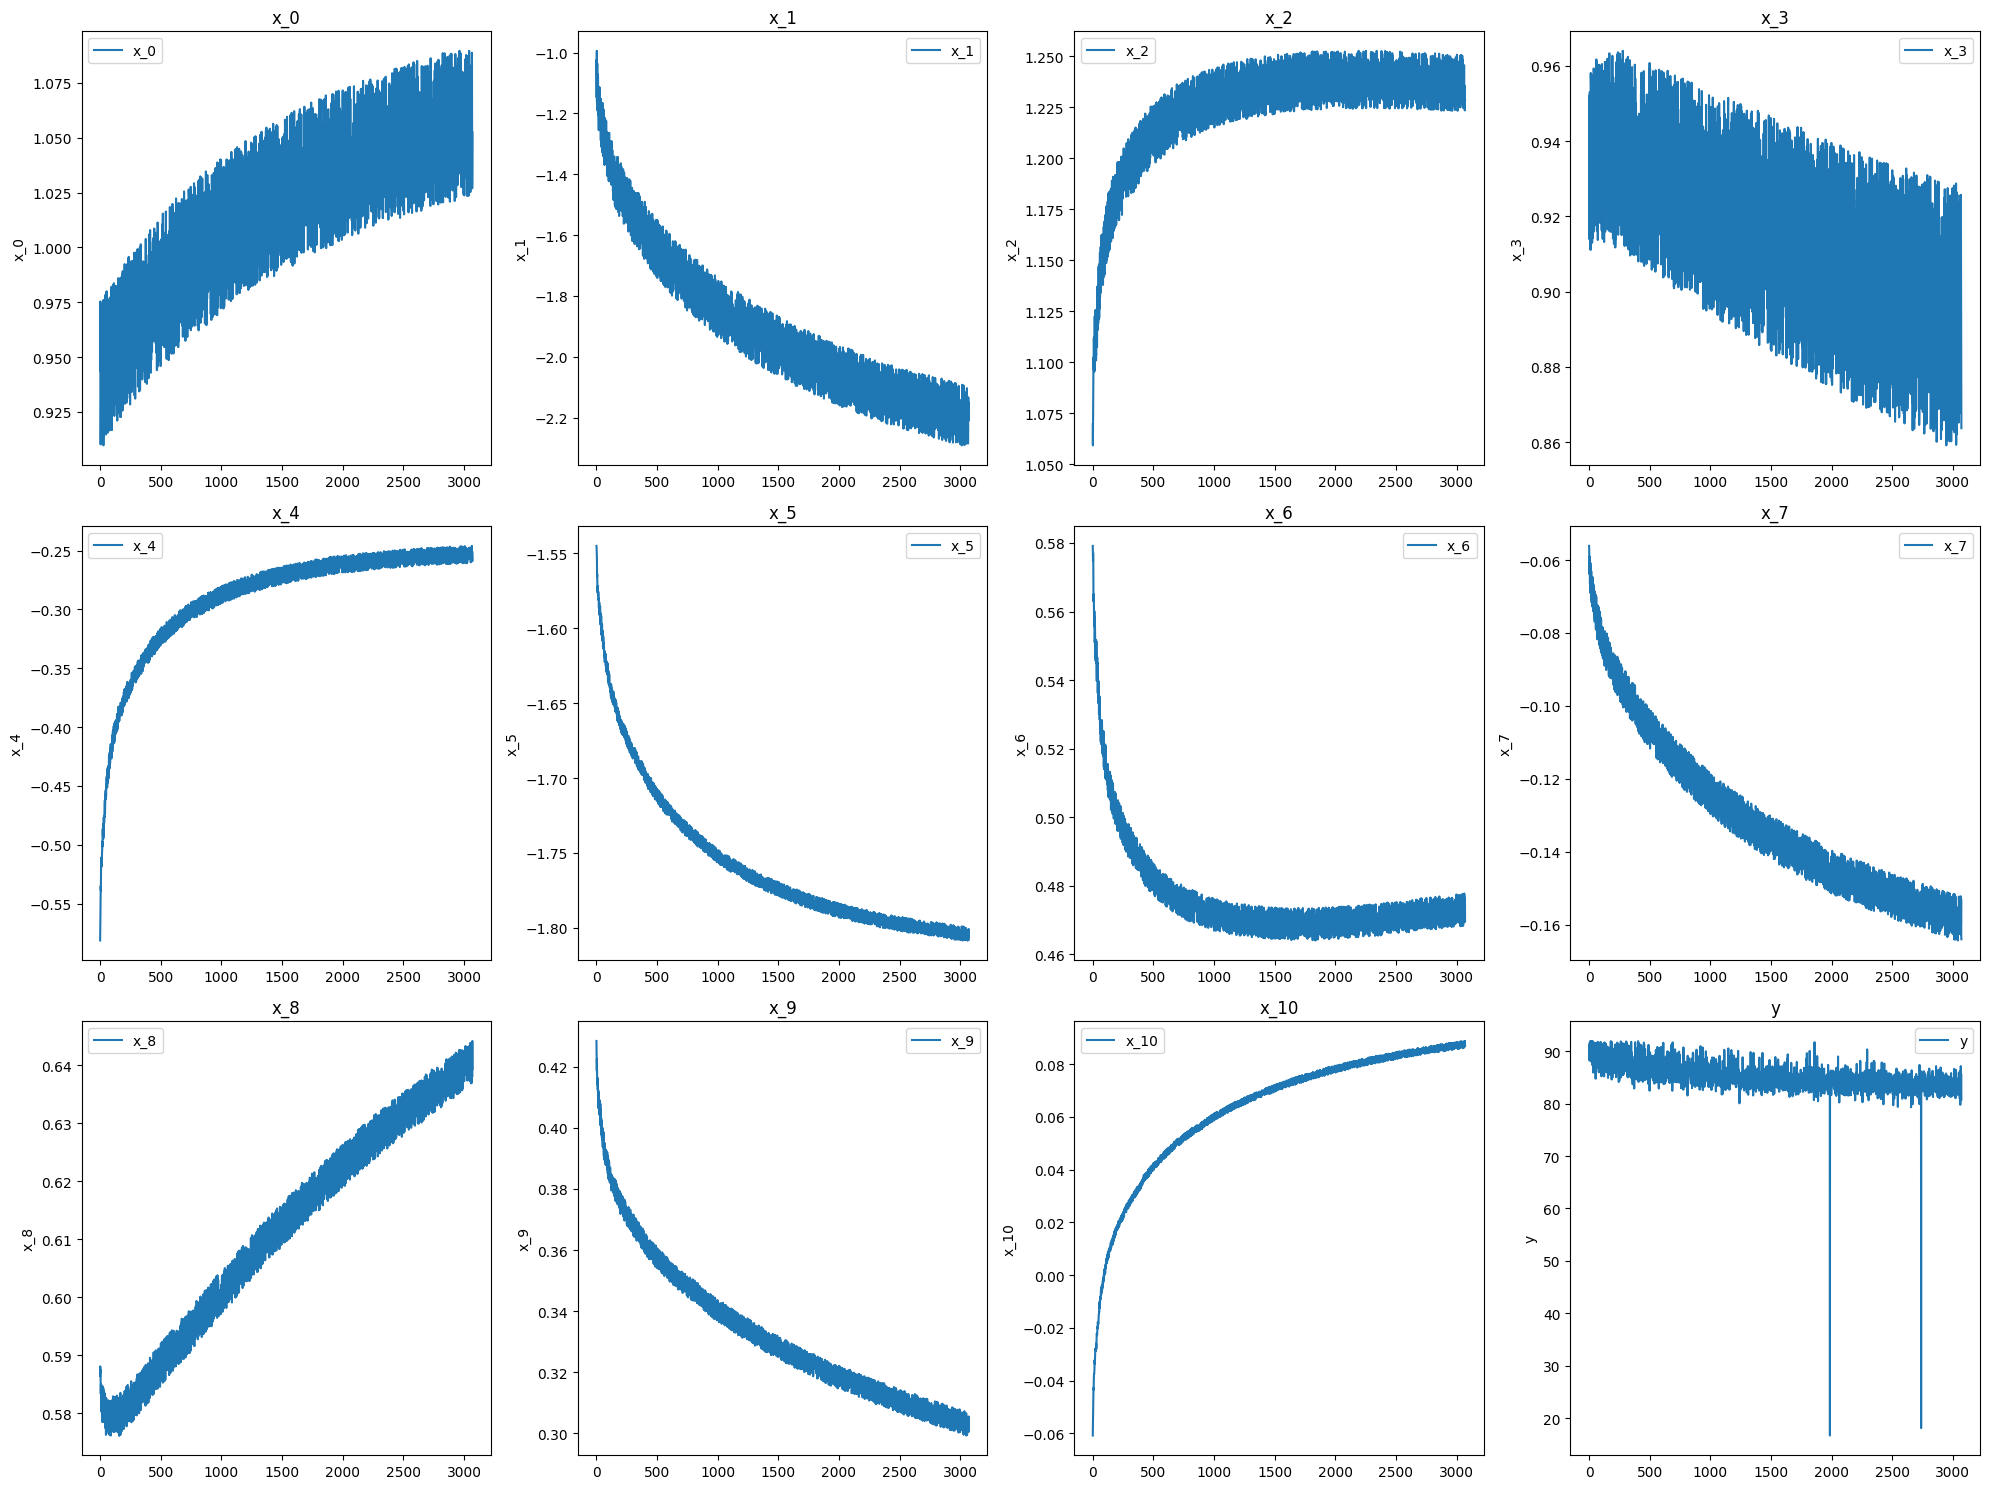

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('train.csv')


# Determine the number of columns and rows for the subplot grid
num_cols = 4
num_rows = 3

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df.columns[1:]):
    if i < len(axes):
        axes[i].plot(df.index, df[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


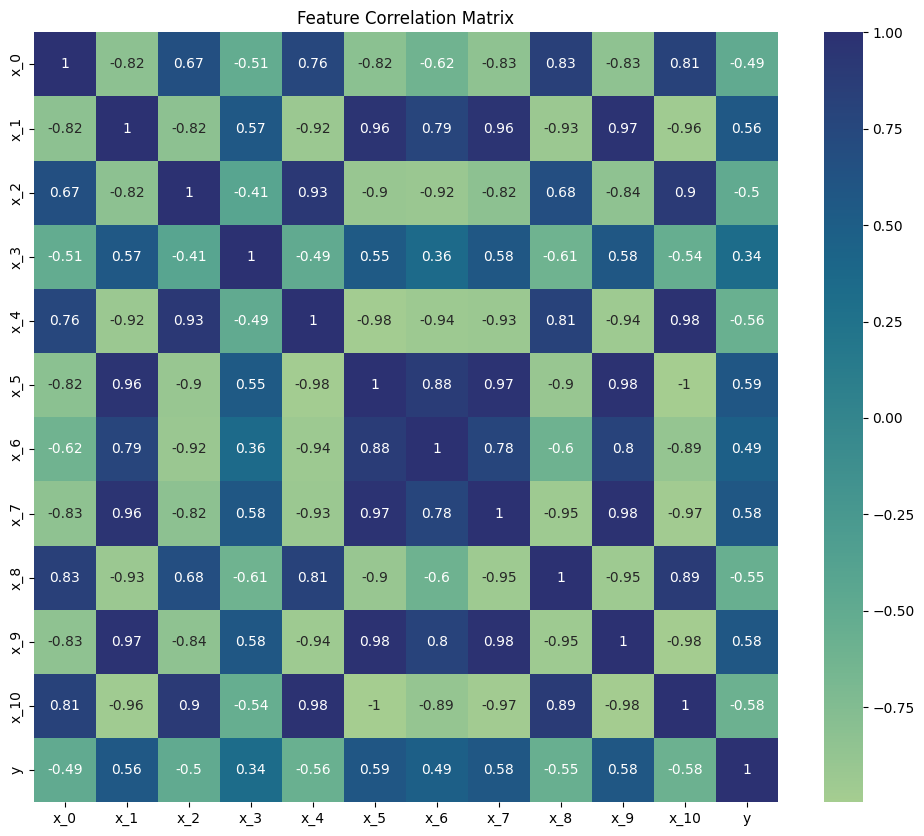

In [4]:
# Check for correlations
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()



# 모델

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = train_df.iloc[:, 1:-1]  # Features
y = train_df['y']  # Target

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train on full dataset
model.fit(X, y)


Cross-validation MSE: 6.5843 (+/- 4.8894)


RandomForestRegressor(random_state=42)

In [8]:
# Predict on test data
X_test = test_df.iloc[:, 1:]
y_pred = model.predict(X_test)

# Identify top 33% of predicted values
threshold = np.percentile(y_pred, 67)
top_33_percent_mask = y_pred >= threshold

# Create submission file
submission_df = pd.read_csv('sample_submission.csv')
submission_df['y'] = y_pred
submission_df.to_csv('updated_submission.csv', index=False)

print(f"Top 33% threshold: {threshold:.4f}")
print(f"Number of samples in top 33%: {sum(top_33_percent_mask)}")

Top 33% threshold: 87.7112
Number of samples in top 33%: 271
